In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

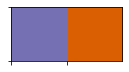

In [2]:
custcol = ["#7570b3", "#d95f02"]
sns.palplot(sns.color_palette(custcol))

In [3]:
datapath = "./"
file_to_open = datapath + "FigureS1_raw_data.txt"

# print(os.path.realpath(file_to_open))


In [4]:
data0 = pd.read_csv(file_to_open, sep = "\t", header = 0)

In [5]:
data0

,hpi,virus,temperature,donor,replicate,titer
0,48,mock,33,1,1,1
1,48,mock,33,2,1,1
2,48,mock,33,3,1,1
3,48,mock,33,1,2,1
4,48,mock,33,2,2,1
...,...,...,...,...,...,...
103,96,SARS-2,37,2,1,1
104,96,SARS-2,37,3,1,1
105,96,SARS-2,37,1,2,1
106,96,SARS-2,37,2,2,1


In [6]:
data0["titer"] = np.log10(data0['titer'])

In [7]:
data1 = data0.groupby(["hpi", "temperature", "virus", "donor"]).mean().reset_index()

In [8]:
t33 = data1.loc[data1["temperature"]==33]
t37 = data1.loc[data1["temperature"]==37]

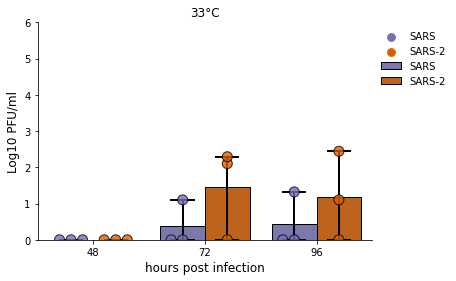

In [9]:
fig, ax = plt.subplots()
g = sns.barplot(data= t33.loc[t33["virus"] != "mock"],
                x='hpi',
                y='titer', 
                hue="virus",
                palette = sns.color_palette(custcol),
                linewidth=1,
                edgecolor = "black",
                capsize=.2,
                errcolor = "black",
                errwidth=2,
                 )

g1 = sns.swarmplot(data= t33.loc[t33["virus"] != "mock"],
                x='hpi',
                y='titer', 
                hue="virus",
                dodge = True, 
                palette = sns.color_palette(custcol),
                size = 10,
                linewidth=1,
                edgecolor = "black",
                alpha = 0.8,
                )

plt.yscale("linear")
plt.ylim([0,6])
plt.title("33°C")
plt.ylabel("Log10 PFU/ml",size="large")
plt.xlabel("hours post infection",size="large")
plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

sns.despine()

plt.savefig('FigureS1b.pdf', bbox_inches = 'tight')

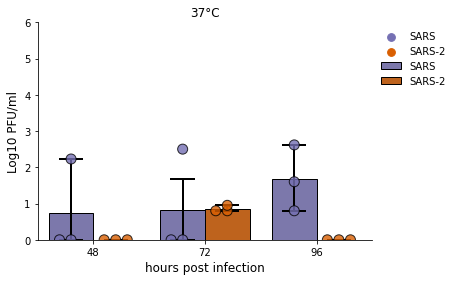

In [10]:
fig, ax = plt.subplots()
g = sns.barplot(data= t37.loc[t37["virus"] != "mock"],
                x='hpi',
                y='titer', 
                hue="virus",
                palette = sns.color_palette(custcol),
                linewidth=1,
                edgecolor = "black",
                capsize=.2,
                errcolor = "black",
                errwidth=2,
                 )

g1 = sns.swarmplot(data= t37.loc[t37["virus"] != "mock"],
                x='hpi',
                y='titer', 
                hue="virus",
                dodge = True, 
                palette = sns.color_palette(custcol),
                size = 10,
                linewidth=1,
                edgecolor = "black",
                alpha = 0.8,
                )

plt.yscale("linear")
plt.ylim([0,6])
plt.title("37°C")
plt.ylabel("Log10 PFU/ml",size="large")
plt.xlabel("hours post infection",size="large")
plt.legend(loc="upper left", bbox_to_anchor=(1,1), frameon=False)

sns.despine()

plt.savefig('FigureS1a.pdf', bbox_inches = 'tight')